# SVD Decomposition and Image Compression

In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

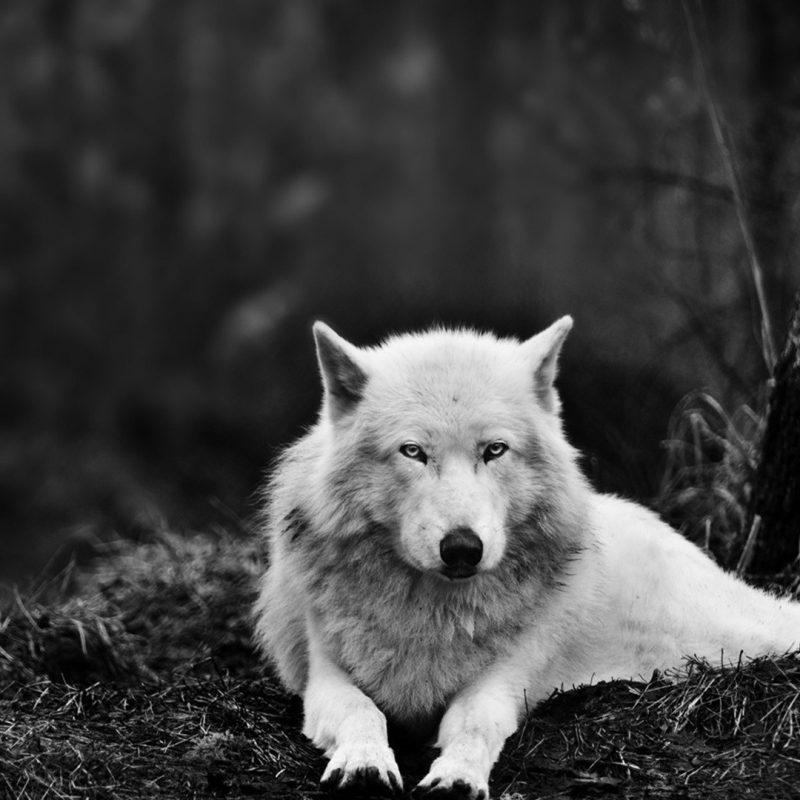

In [2]:
#Import image
from PIL import Image
image = Image.open('wolf.jpg')

image.show()

In [3]:
# Convert to numpy array
data = np.asarray(image.convert('L'))
print(f'Data format: {data.shape}')

Data format: (800, 800)


In [4]:
#Compute SVD decomposition
U, S, V = np.linalg.svd(data, full_matrices=True)

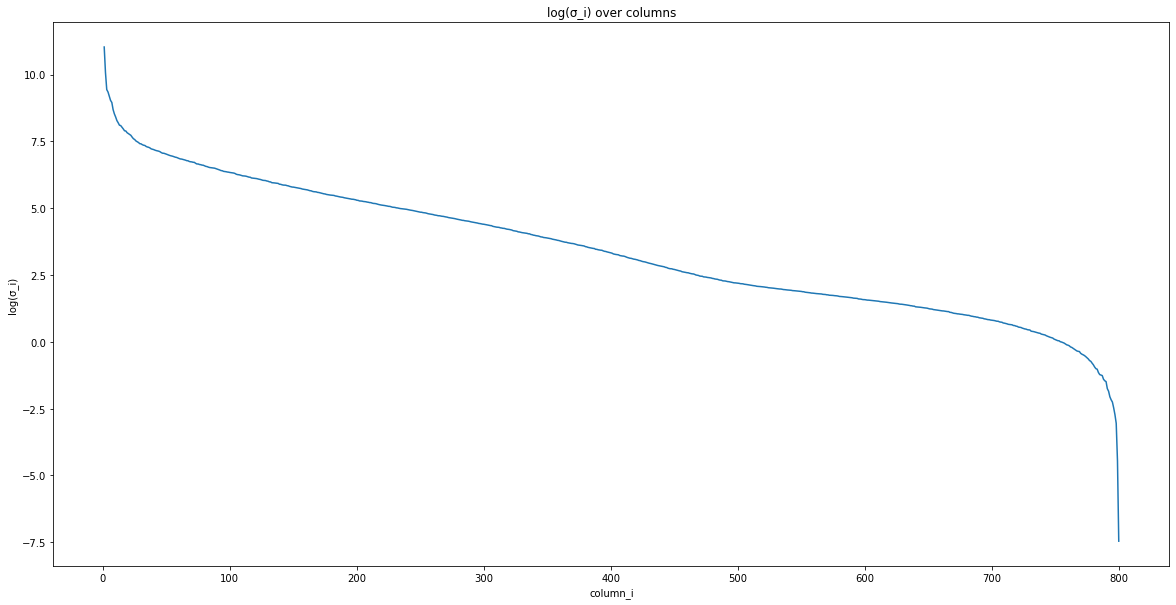

In [5]:
# Plot σ over columns
plt.figure(figsize=(20,10))
plt.plot(np.arange(1,len(S)+1),np.log(S))
plt.title('log(σ_i) over columns')
plt.xlabel('column_i')
plt.ylabel('log(σ_i)')
plt.show()

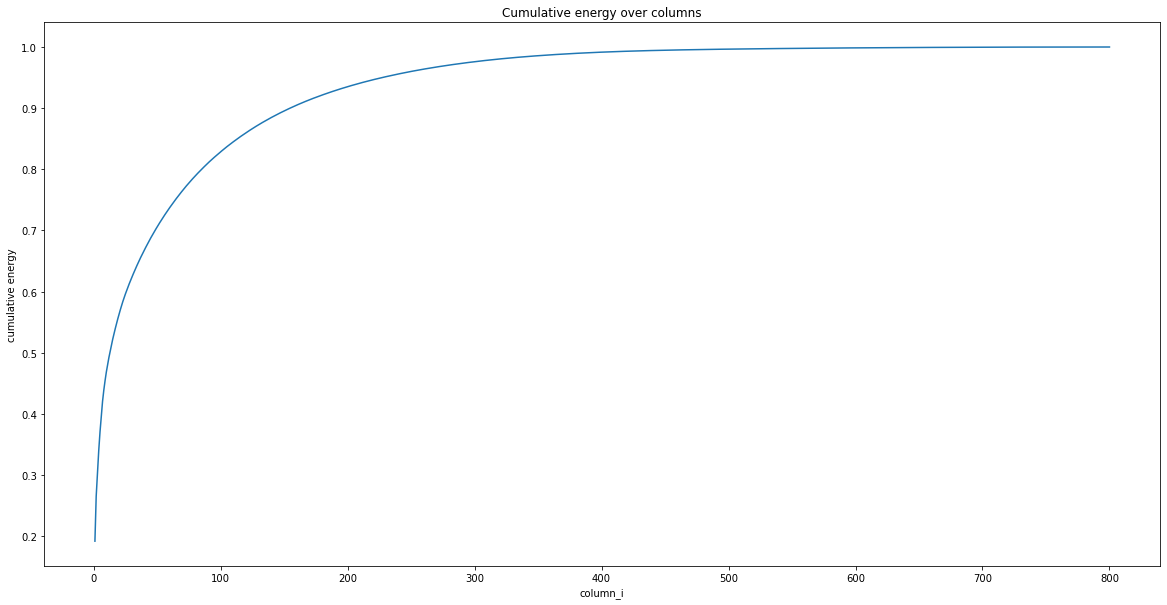

In [6]:
# Cumulative image energy over columns
total_E = np.sum(S)
cum_E = np.cumsum(S) / total_E

plt.figure(figsize=(20,10))
plt.plot(np.arange(1,len(S)+1),cum_E)
plt.title('Cumulative energy over columns')
plt.xlabel('column_i')
plt.ylabel('cumulative energy')
plt.show()

In [7]:
# Compute projection maps

r = 30
n_maps = []

for i in range(r):
    n_maps.append(np.outer(U[:,i],V[i,:]))

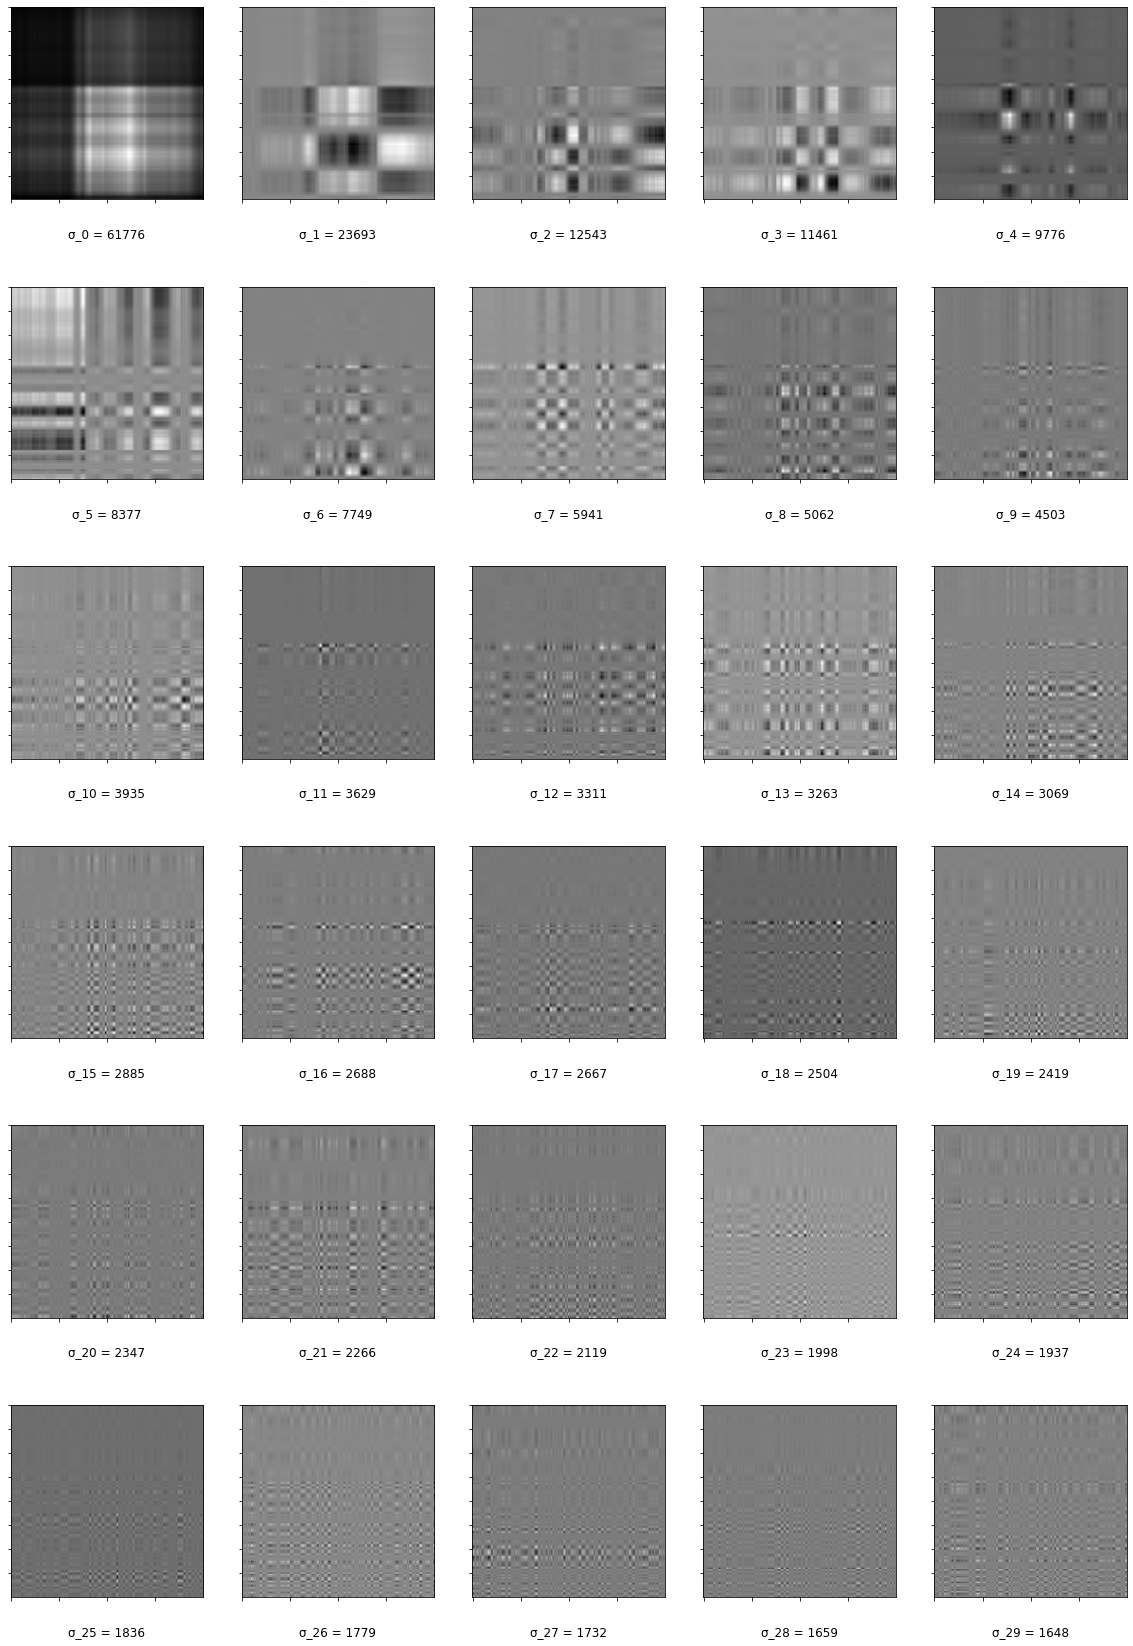

In [8]:
# Plot each individual projection map

plt.figure(figsize=(20,r))
columns = 5
for i, n_map in enumerate(n_maps):
    ax = plt.subplot(int(len(n_maps) / columns), columns, i + 1)
    ax.text(0.5,-0.2, f'σ_{i} = {S[i]:.0f}', size=12, ha="center",transform=ax.transAxes)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
    plt.imshow(n_map, cmap='gray')

In [9]:
# Reconstruct the image using the first j projection maps (scaled by σ_i)

n_reconstructions = []

for i in range(r):
    n_reconstructions.append(np.outer(U[:,0],V[0,:]) * S[0])
    for j in range(1,i):
        n_reconstructions[i] += np.outer(U[:,j],V[j,:]) * S[j]

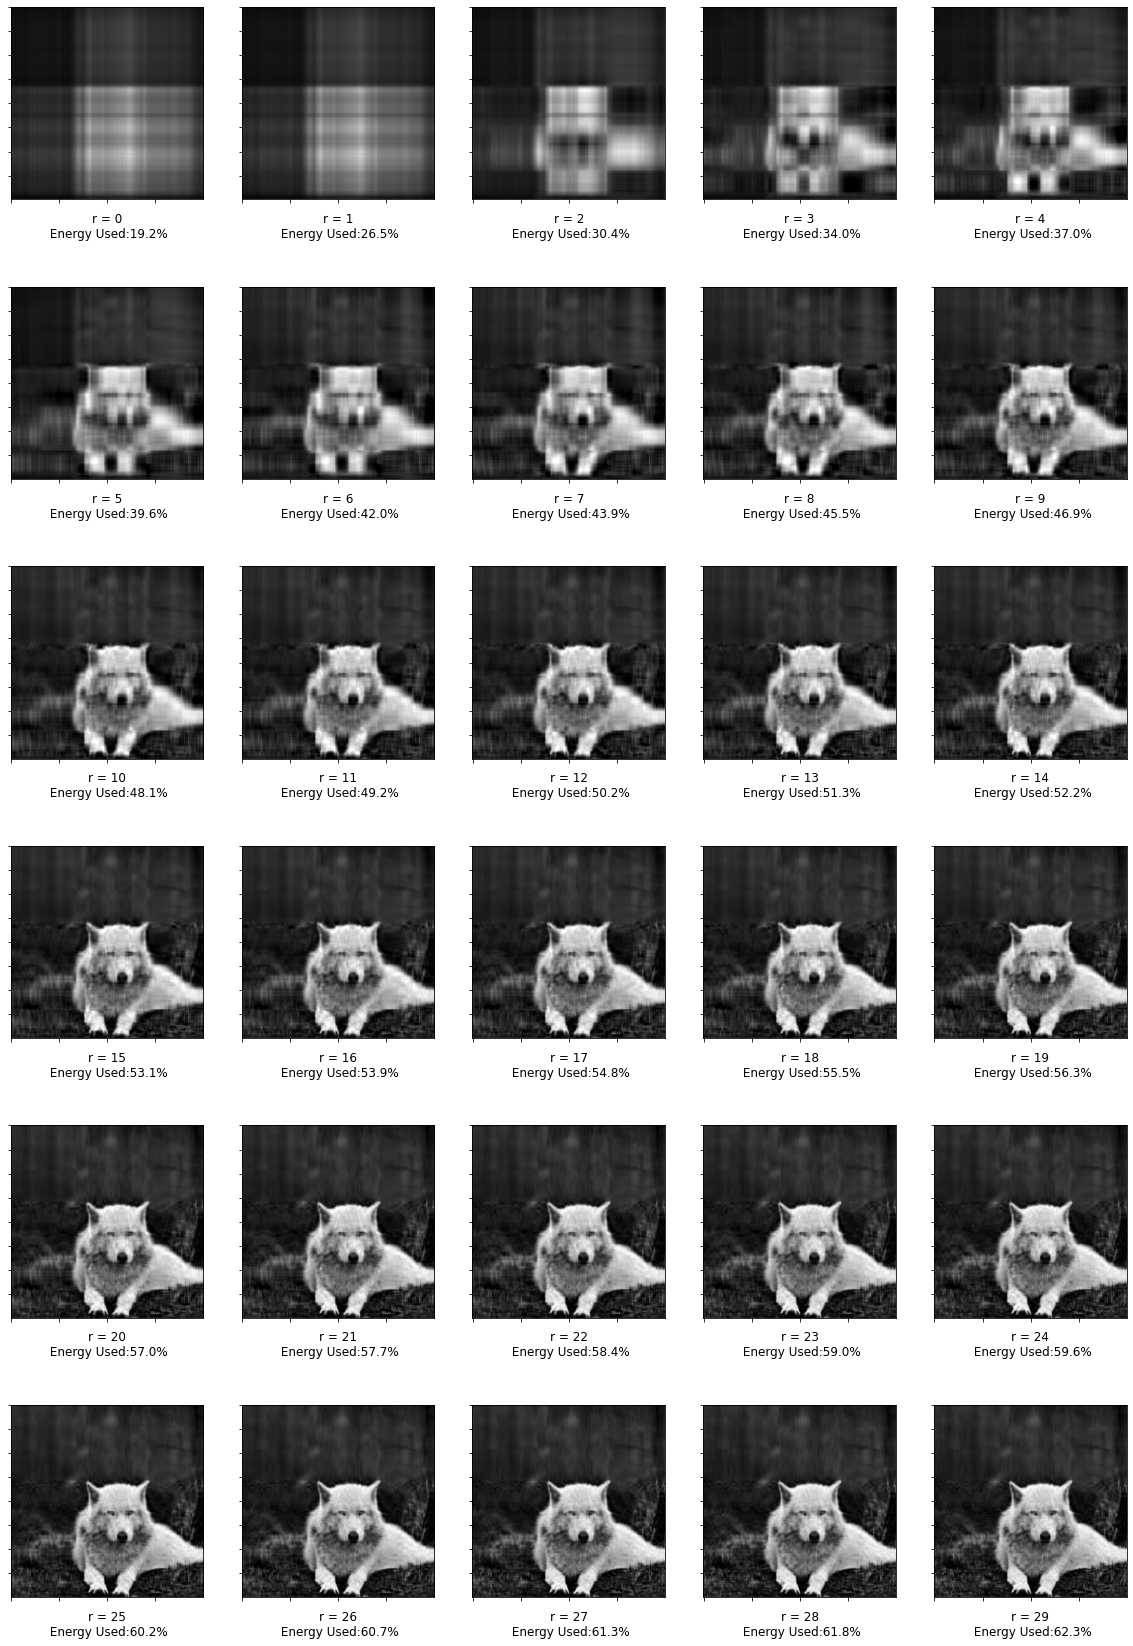

In [10]:
# Plots the reconstructed image

plt.figure(figsize=(20,r))
columns = 5
for i, n_reconstruction in enumerate(n_reconstructions):
    ax = plt.subplot(int(len(n_reconstructions) / columns), columns, i + 1)
    ax.text(0.5,-0.2, f'r = {i}\n Energy Used:{cum_E[i]:.1%}', size=12, ha="center",transform=ax.transAxes)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(Image.fromarray(n_reconstruction))